In [22]:
import numpy as np
import os
import glob
import scipy.ndimage as ndimage
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt

In [17]:
# Load all the images up
directory_path = './data/cells'
image_files = [f for f in glob.glob(os.path.join(directory_path, '*')) if 'Edges' not in os.path.basename(f)]
images = [np.array(Image.open(filename).convert('L'), dtype=np.float32) for filename in image_files]

In [37]:
def process_images(images, edge_type, apply_blur=False):
    processed_images = []
    
    for img in images:

        if apply_blur:
            img = cv.GaussianBlur(img, (5, 5), 0)

        edges = None

        if edge_type == "Roberts":
            gx_mask = np.array([[1, 0 ], [0,-1 ]])
            gy_mask = np.array([[ 0, 1 ], [ -1, 0 ]])

            vertical = ndimage.convolve(img, gx_mask)
            horizontal = ndimage.convolve(img, gy_mask)

            edges = np.sqrt(np.square(horizontal) + np.square(vertical))*255 

        if edge_type == "Sobel":
            # 1 channel of signed 2-byte integer
            ddepth = cv.CV_16S
            scale = 1
            delta = 0

            grad_x = cv.Sobel(img, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)    
            grad_y = cv.Sobel(img, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)

            abs_grad_x = cv.convertScaleAbs(grad_x)
            abs_grad_y = cv.convertScaleAbs(grad_y)

            grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
            edges = grad

        if edge_type == "First Order Gaussian":
            gx_mask = np.array([[-1, 1 ], [-1, 1]])
            gy_mask = np.array([[ 1, 1 ], [ -1, -1 ]])

            # What I presume is the Gaussian step of "First Order Gaussian"
            img = cv.GaussianBlur(img, (3, 3), 0)

            vertical = ndimage.convolve(img, gx_mask)
            horizontal = ndimage.convolve(img, gy_mask)

            edges = (np.abs(horizontal) + np.abs(vertical))*255 
            
        processed_images.append(edges)
        
    return processed_images

In [38]:
def display_processed_images(processed_images):
    n = len(processed_images)
    cols = 3
    rows = n // cols + (1 if n % cols else 0)
    
    plt.figure(figsize=(15, rows * 5)) 
    
    for i, image in enumerate(processed_images, start=1):
        plt.subplot(rows, cols, i)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

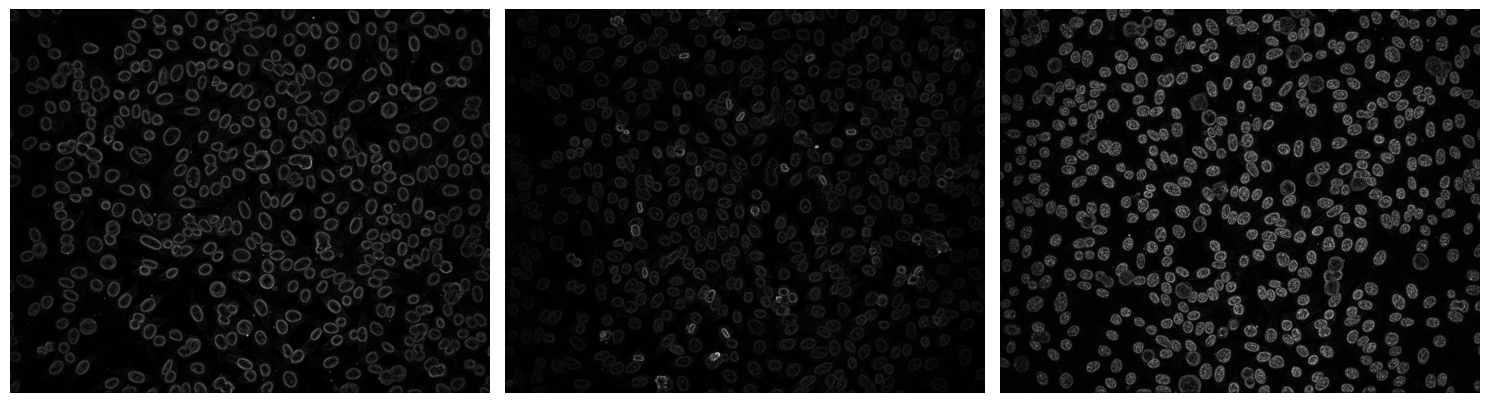

In [39]:
processed_images = process_images(images, "First Order Gaussian", False)
display_processed_images(processed_images=processed_images)